In [46]:
## Central Limit Theorem

In [47]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 

def science_plot(fontsize = 8):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

   face   n
0     1  50
1     2  46
2     3  67
3     4  42
4     5  50
5     6  45


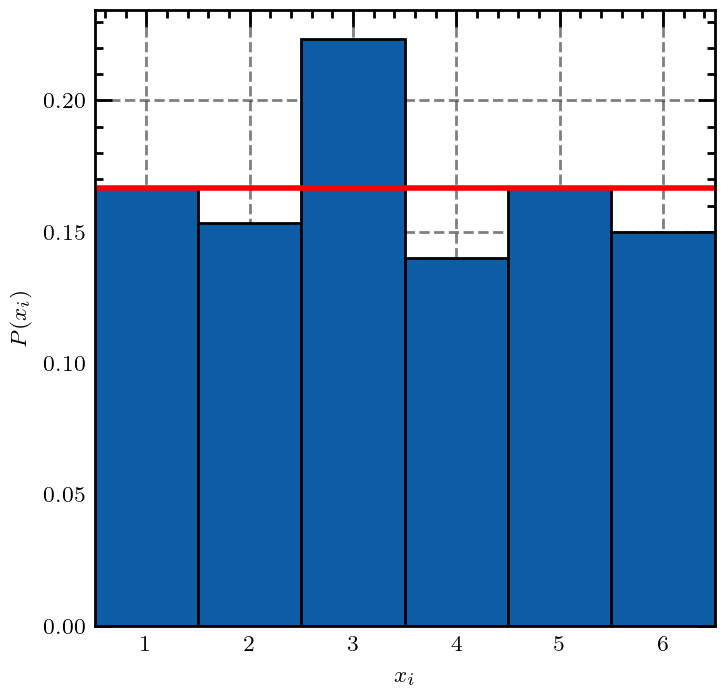

   face   n
0     1  32
1     2  37
2     3  38
3     4  51
4     5  30
5     6  40
6     7  37
7     8  35


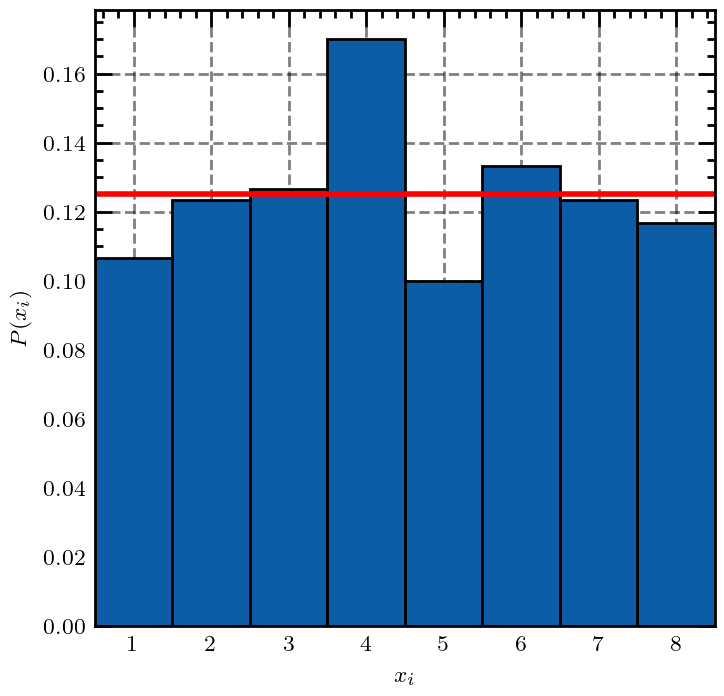

In [ ]:
## central limit

## uniform 6 side
data = pd.read_csv(r"C:\Users\verci\Documents\Python Code\Physics157\PHYSICS191 CODE\SET A\E2\uniform6.csv")
print(data)
d = len(data['n'])
total = data['n'].sum()

x = data['face']
y = data['n']/total

dpiv = 200
plt.figure(figsize = (3,3),dpi = dpiv)
plt.bar(
    x, 
    y,
    width = 1,
    edgecolor = 'k'
)
plt.axhline(1/6, color = 'r')
plt.xlim(.5,d+.5)
plt.ylabel('$P(x_i)$')
plt.xlabel('$x_i$')
plt.show()

## uniform 8 side
data = pd.read_csv(r"C:\Users\verci\Documents\Python Code\Physics157\PHYSICS191 CODE\SET A\E2\uniform12.csv")
print(data)
d = len(data['n'])
total = data['n'].sum()

x = data['face']
y = data['n']/total

dpiv = 200
plt.figure(figsize = (3,3),dpi = dpiv)
plt.bar(
    x, 
    y,
    width = 1,
    edgecolor = 'k'
)
plt.axhline(1/8, color = 'r')
plt.xlim(.5,d+.5)
plt.ylabel('$P(x_i)$')
plt.xlabel('$x_i$')
plt.show()

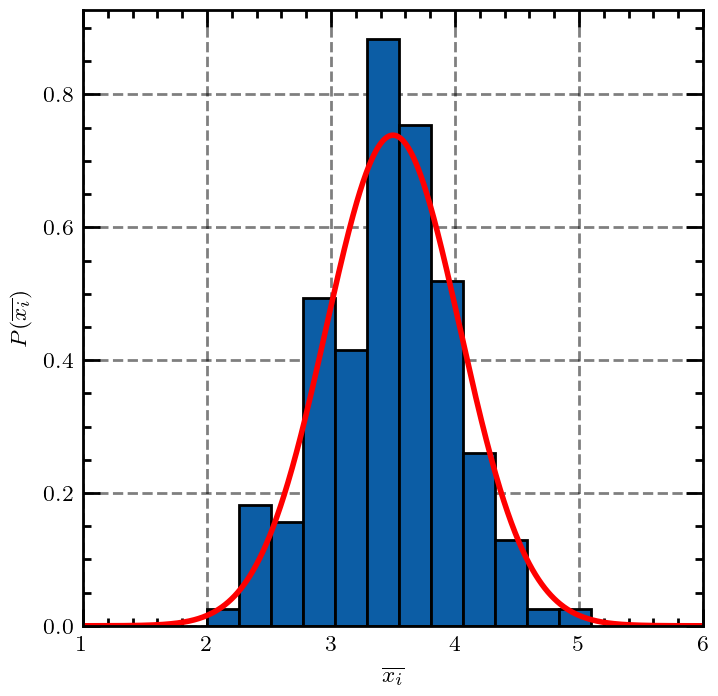

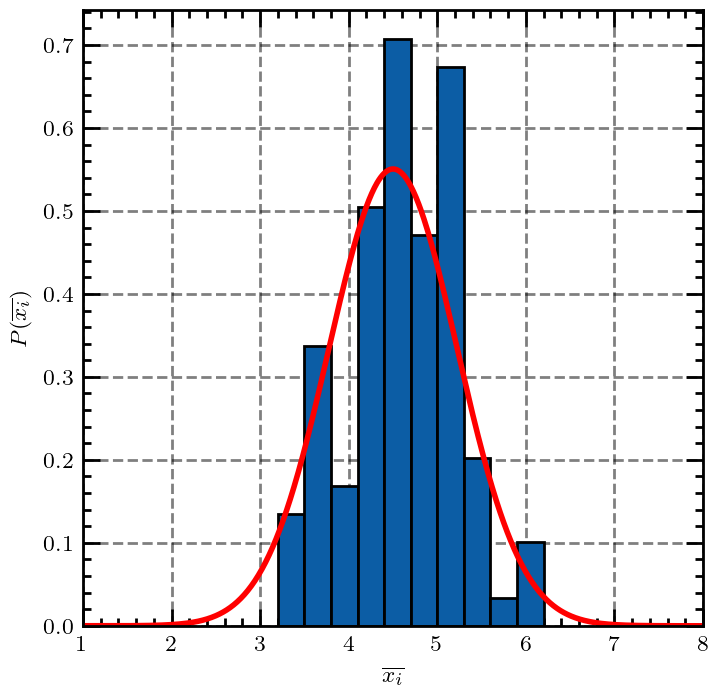

In [ ]:
## central limit n
from scipy.stats import norm

def clt(d, N):
    # Parameters
    mu = np.sum(np.arange(1,d+1)*(1/d))
    sigma = np.sqrt(np.sum((np.arange(1,d+1) - mu)**2)*(1/d) / N)
    return mu, sigma

## 6
data = pd.read_csv(r"C:\Users\verci\Documents\Python Code\Physics157\PHYSICS191 CODE\SET A\E2\means_central6.csv")

x = np.linspace(1, 6, 1000)
mu, sigma = clt(6,10)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize = (3,3),dpi = dpiv)
plt.hist(
    data,
    bins = 12,
    edgecolor = 'k',
    linewidth = 1,
    density = True
)
plt.plot(
    x, 
    pdf, 
    color = 'r'
)
plt.xlim(1,6)
plt.xlabel(r'$\overline{x_i}$')
plt.ylabel(r'$P(\overline{x_i})$')
plt.show()

##8
data = pd.read_csv(r"C:\Users\verci\Documents\Python Code\Physics157\PHYSICS191 CODE\SET A\E2\means_central8.csv")
plt.figure(figsize = (3,3),dpi = dpiv)
plt.hist(
    data,
    bins = 10,
    edgecolor = 'k',
    linewidth = 1,
    density = True
)
x = np.arange(0,8,0.01)
mu, sigma = clt(8,10)
pdf = norm.pdf(x, mu, sigma)

plt.plot(
    x, 
    pdf, 
    color = 'r'
)
plt.xlim(1,8)
plt.xlabel(r'$\overline{x_i}$')
plt.ylabel(r'$P(\overline{x_i})$')
plt.show()

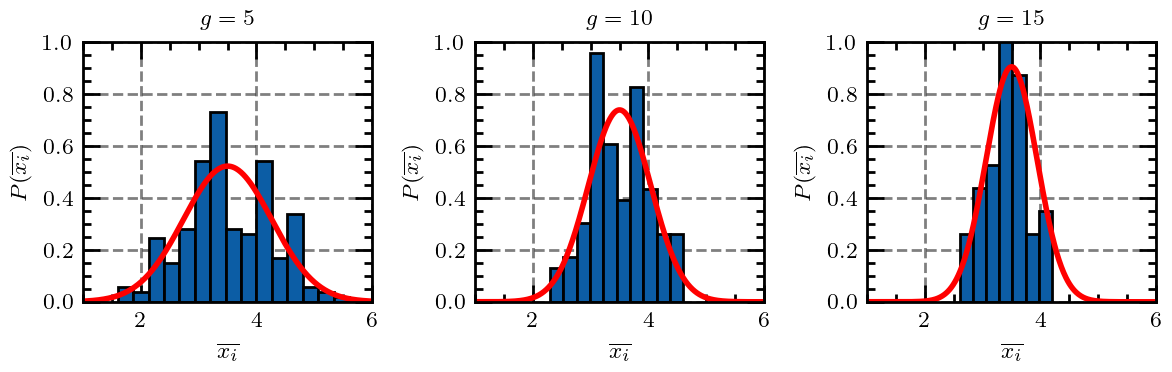

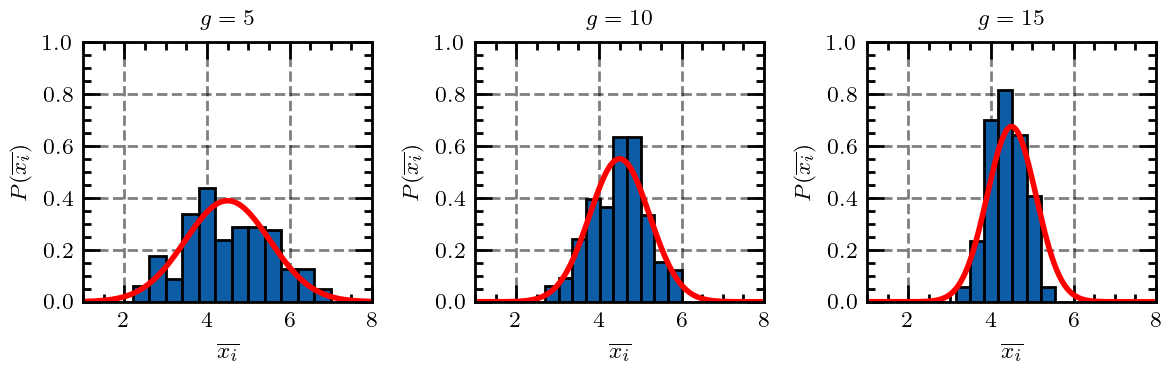

In [ ]:
d6 = pd.read_csv(r'C:\Users\verci\Documents\Python Code\Physics157\PHYSICS191 CODE\SET A\E2\diffclt6.csv')
d8 = pd.read_csv(r'C:\Users\verci\Documents\Python Code\Physics157\PHYSICS191 CODE\SET A\E2\diffclt8.csv')
d6_05 = d6['5']
d6_10 = d6['10']
d6_20 = d6['15']
d8_05 = d8['5']
d8_10 = d8['10']
d8_20 = d8['15']

rans = [5,10,15]
binss = [12,10,7]
fig, ax = plt.subplots(nrows = 1,ncols = 3, figsize = (6,2), dpi = dpiv)
for i in range(3):
    ax[i].hist(
        d6[f'{rans[i]}'],
        bins = binss[i],
        edgecolor = 'k',
        linewidth = 1,
        density = True
    )
    x = np.arange(0,6,0.01)
    mu, sigma = clt(6,rans[i])
    pdf = norm.pdf(x, mu, sigma)
    ax[i].plot(
        x, 
        pdf, 
        color = 'r'
    )
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(1,6)
    ax[i].set_xlabel(r'$\overline{x_i}$')
    ax[i].set_ylabel(r'$P(\overline{x_i})$')
    ax[i].set_title(f'$g = {rans[i]}$')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows = 1,ncols = 3, figsize = (6,2), dpi = dpiv)
for i in range(3):
    ax[i].hist(
        d8[f'{rans[i]}'],
        bins = binss[i],
        edgecolor = 'k',
        linewidth = 1,
        density = True
    )
    x = np.arange(0,8,0.01)
    mu, sigma = clt(8,rans[i])
    pdf = norm.pdf(x, mu, sigma)
    ax[i].plot(
        x, 
        pdf, 
        color = 'r'
    )
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(1,8)
    ax[i].set_xlabel(r'$\overline{x_i}$')
    ax[i].set_ylabel(r'$P(\overline{x_i})$')
    ax[i].set_title(f'$g = {rans[i]}$')
plt.tight_layout()
plt.show()